In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import pandas as pd 
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime

from split_filename import *
from GOLD import *

In [22]:
infile = 'C:\\Users\\Luiz Felipe\\Downloads\\O2DEN2019111120191112\\tmp\\archive_L2\\2019\\315\\'

filename = 'GOLD_L2_O2DEN_2019_315_v02_r01_c01.nc'


ds = xr.open_dataset(infile + filename)

ds.coords['nevents'] = bytes_string(ds['time_utc'])

ds.coords['nzret_max'] = ds['zret'].max(dim = 'nevents')

NameX = ds['zret'].attrs['CATDESC']
UnitX = ds['zret'].attrs['UNITS']



ds

<xarray.Dataset>
Dimensions:             (n_wavelength: 2, nevents: 9, nzdat_max: 23, nzret_max: 36)
Coordinates:
  * nevents             (nevents) object 2019-11-11T06:26:29.076000+00:00 ... 2019-11-11T19:58:02.215000+00:00
Dimensions without coordinates: n_wavelength, nzdat_max, nzret_max
Data variables:
    spectral_width      (nevents) float32 ...
    o2den_unc_ran       (nevents, nzret_max) float32 ...
    lon_ref             (nevents) float32 ...
    o2den_unc_mod       (nevents, nzret_max) float32 ...
    temperature         (nevents, nzret_max) float32 ...
    zret                (nevents, nzret_max) float32 ...
    o2den               (nevents, nzret_max) float32 ...
    nzdat               (nevents, n_wavelength) int32 ...
    time_utc            (nevents) |S50 b'2019-11-11T06:26:29.076Z' ... b'2019-11-11T19:58:02.215Z'
    n_iter              (nevents) int32 ...
    convergence         (nevents) int32 ...
    nzret               (nevents) int32 ...
    input_l1c_file      (nevents) |S50 ...
    o2den_unc_sys       (nevents, nzret_max) float32 ...
    lat_ref             (nevents) float32 ...
    normalization       (nevents, n_wavelength) float32 ...
    o2den_dqi           (nevents, nzret_max) int32 ...
    channel             (nevents) |S50 ...
    central_wavelength  (nevents, n_wavelength) float32 ...
    signal_to_noise     (nevents, n_wavelength) float32 ...
    zdat                (nevents, n_wavelength, nzdat_max) float32 ...
    dqi                 (nevents) int32 ...
    transmission_fit    (nevents, n_wavelength, nzdat_max) float32 ...
    transmission        (nevents, n_wavelength, nzdat_max) float32 ...
    o2_apriori          (nevents, nzret_max) float32 ...
    sza_ref             (nevents) float32 ...
    transmission_unc    (nevents, n_wavelength, nzdat_max) float32 ...
    target_star         (nevents) |S50 ...
Attributes:
    Data_revision:               01
    Logical_source:              GOLD_L2_O2DEN
    PI_name:                     Richard Eastes
    TEXT:                        The GOLD mission of opportunity flies an ult...
    Mission_group:               GOLD
    Data_version:                02
    Data_type:                   APIDx? > GOLD Application ID 0x?: Level 2 Da...
    Generation_date:             20191111
    date_start:                  2019-11-11T06:26:29Z
    dqi:                         2
    Instrument_type:             UV Imaging Spectrograph (Space)
    PI_affiliation:              University of Colorado/LASP
    Source_name:                 GOLD>Global-scale Observations of the Limb a...
    Data_cycle:                  01
    Acknowledgement:             This is a data product from the NASA Global-...
    Logical_source_description:  GOLD O2DEN L2 Daily File
    Discipline:                  Space Physics > Ionospheric Science
    Logical_file_id:             GOLD_L2_O2DEN_2019_315_v02_r01_c01
    date_end:                    2019-11-11T19:58:02Z
    Descriptor:                  O2DEN>O2 density
    Project:                     NASA > GOLD
    Software_version:            dafdbd1

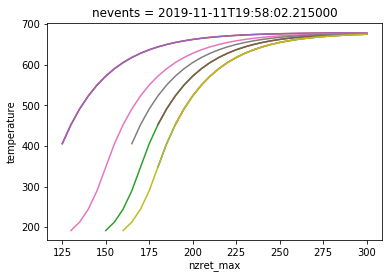

In [70]:

for i in range(9):
    

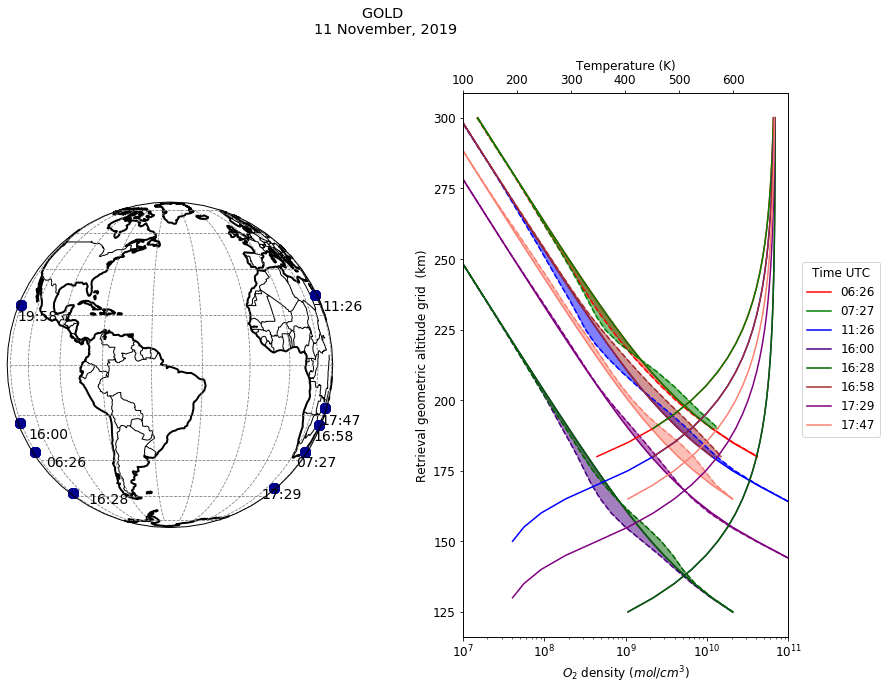

In [208]:
fig = plt.figure(figsize = (14, 10))

ax = fig.add_subplot(1, 2, 1, projection = ccrs.Orthographic(central_longitude= -47.5))

features_of_map(ax)

lats = ds['lat_ref'].values
lons = ds['lon_ref'].values
time = ds['nevents'].values

for x, y, text in zip(lons, lats, time):
    textf = text.strftime("%H:%M")
    
    ax.plot(lons, lats, marker ='o', markersize = 10, linestyle = 'none',
           transform = ccrs.PlateCarree(), color = 'darkblue')
    ax.text(x + 3, y - 6, textf, fontsize = 14, transform = ccrs.PlateCarree())
    

ax1 = fig.add_subplot(1, 2, 2)

cmap = ['red', 'green', 'blue', 'indigo', 'darkgreen','brown', 'purple', 'salmon', 'violet']

ax2 = ax1.twiny()

for i in range(8):
    x = ds['o2_apriori'].isel(nevents = i).values
    x1 = ds['o2den'].isel(nevents = i).values
    y = ds['nzret_max'].values
    
    val = ds['o2den'].isel(nevents = i)
    time = pd.to_datetime(val['nevents'].values).strftime("%H:%M")

    ax1.plot(x, y, color = cmap[i], label = time)
    ax1.plot(x1, y, '--', color = cmap[i], label = None)
    
    ax1.fill_betweenx(y, x, x1, color = cmap[i], alpha='0.5')
    
    ax1.set(xscale = 'log', ylabel = f"{NameX} ({UnitX})", 
            xlabel = '$O_2$ density ($mol/cm^3$)', xlim =[10e6, 10e10])
    
    ax1.legend(bbox_to_anchor=(1.3, 0.7), loc = 'upper right', title = 'Time UTC')
    

    temp = ds['temperature'].isel(nevents = i).values
    
    ax2.plot(temp, y, color = cmap[i])
    
    ax2.set(xticks = np.arange(100, 700, 100), xlabel = 'Temperature (K)')
    
    
plt.subplots_adjust(wspace = 0.4)

plt.rcParams.update({'font.size': 12})  

fig.suptitle('GOLD \n' + split_filename(filename).date(), y = 1.)  

plt.show()

In [209]:
PathOut = 'C:\\Users\\Luiz Felipe\\Google Drive\\Doutorado\\Modelos_Latex_INPE\\Figuras1\\'
FigureName = 'GOLD_O2DEN_2019_11_11'
fig.savefig(PathOut + FigureName + '.png', dpi = 100, quality = 95, bbox_inches="tight")
